# Predict titanic survived

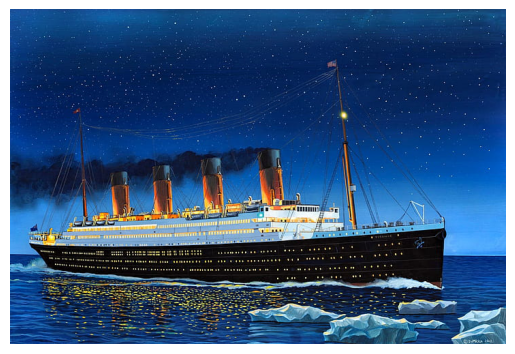

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pillow_avif  # Register AVIF support

# Define the image file path
image_path = r"C:\Users\ssour\Downloads\night-ice-uk-transatlantic-steamer-titanic-hd-wallpaper-preview.jpg"

# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

# Import Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\ssour\OneDrive\Documents\new_titanic.csv")

In [4]:
df.head()

,sex,age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,male,34.5,0,0,330911,7.8292,Q,0
1,female,47.0,1,0,363272,7.0000,S,1
2,male,62.0,0,0,240276,9.6875,Q,0
3,male,27.0,0,0,315154,8.6625,S,0
4,female,22.0,1,1,3101298,12.2875,S,1


# Data Cleaning

In [6]:
df.isnull().sum()

sex         0
age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [7]:
df.dtypes

sex          object
age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [8]:
print("The dimensions of these datasets: ",df.shape)
print("The columns of these datasets: ",df.columns)

The dimensions of these datasets:  (231, 8)
The columns of these datasets:  Index(['sex', 'age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')


In [9]:
df.describe()

,age,SibSp,Parch,Ticket,Fare,Survived
count,231.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000
mean,30.002857,0.454545,0.337662,2.320951e+05,34.002906,0.363636
std,13.622623,0.778160,0.721298,4.084430e+05,46.641425,0.482090
min,0.330000,0.000000,0.000000,6.800000e+02,0.000000,0.000000
25%,21.000000,0.000000,0.000000,2.058900e+04,7.895800,0.000000
50%,27.000000,0.000000,0.000000,2.284140e+05,13.500000,0.000000
75%,38.000000,1.000000,0.000000,3.470710e+05,31.943750,1.000000
max,76.000000,4.000000,5.000000,3.101298e+06,263.000000,1.000000


<Axes: >

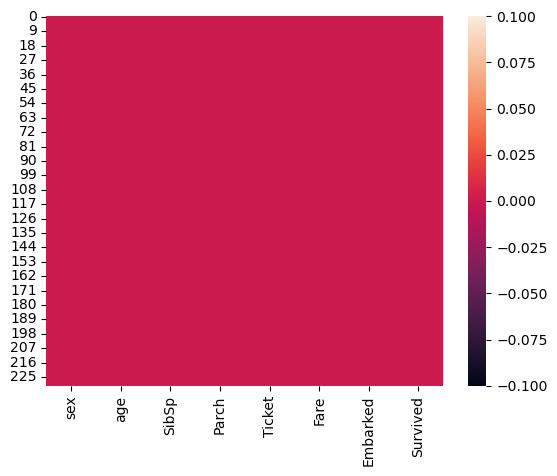

In [10]:
sns.heatmap(df.isnull())

In [11]:
# Categorical columns
categorical_col =[]
for i in df.dtypes.index:
    if df[i].dtypes== 'object':
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)

# Numerical columns
numerical_col =[]
for i in df.dtypes.index:
    if df[i].dtypes!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['sex', 'Embarked']
Numerical Columns:  ['age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Survived']


# Exploratory Data Analysis

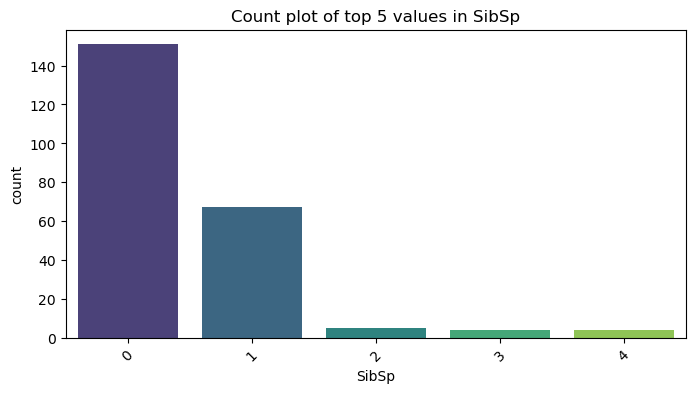

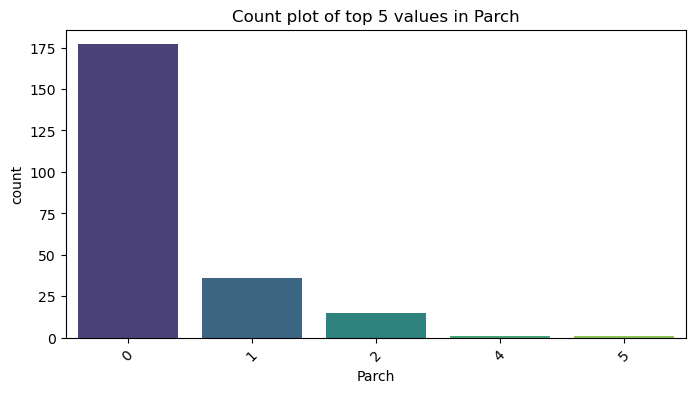

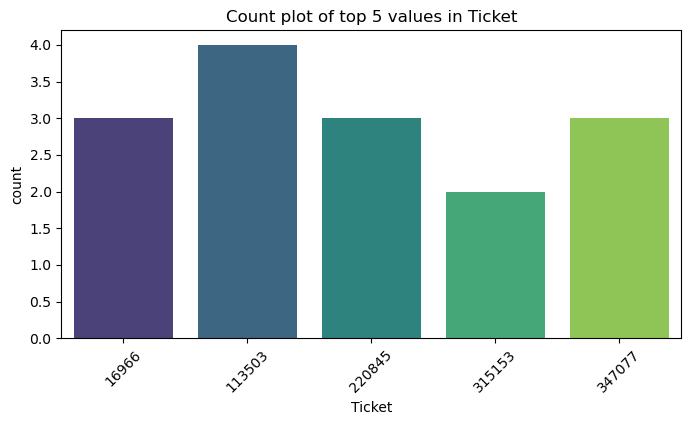

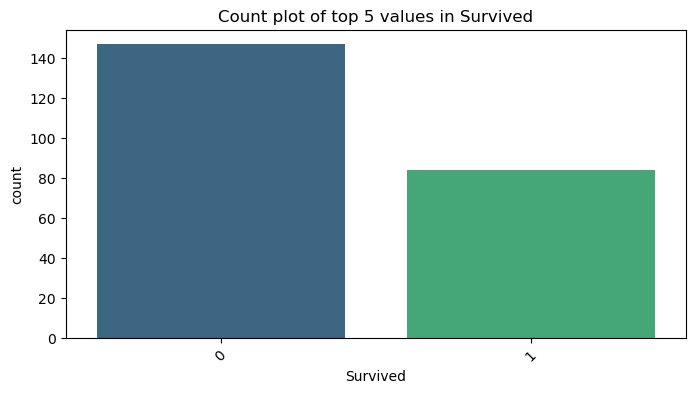

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette globally
sns.set_palette("pastel")  # You can choose any palette like "bright", "dark", "muted", etc.

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    # Get the top 5 most frequent values for the column
    top_5_values = df[col].value_counts().nlargest(5).index
    
    # Filter the dataframe to include only the top 5 values
    filtered_df = df[df[col].isin(top_5_values)]
    
    sns.countplot(x=col, data=filtered_df, palette="viridis")
    plt.title(f'Count plot of top 5 values in {col}')
    plt.xticks(rotation=45)
    plt.show()

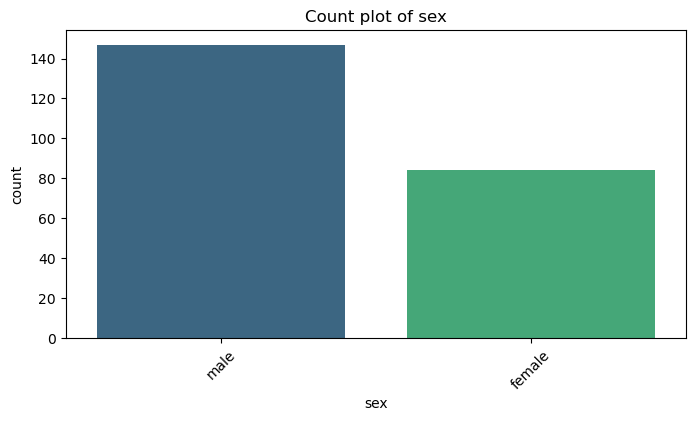

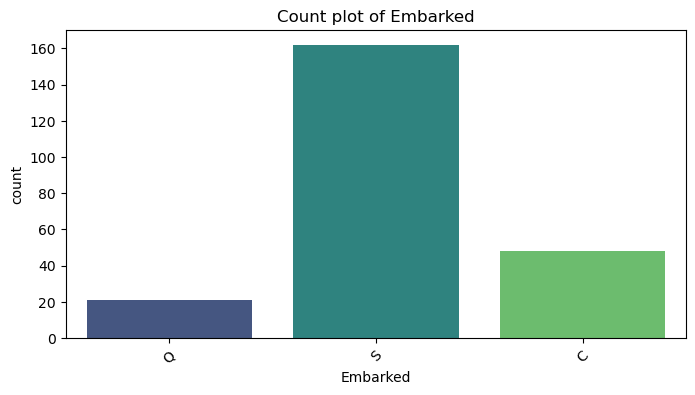

In [13]:
# Set the color palette globally
sns.set_palette("pastel")  # You can choose any palette like "bright", "dark", "muted", etc.

# Plot countplots for each categorical_col
for col in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette="viridis")  # You can specify palette for each plot
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

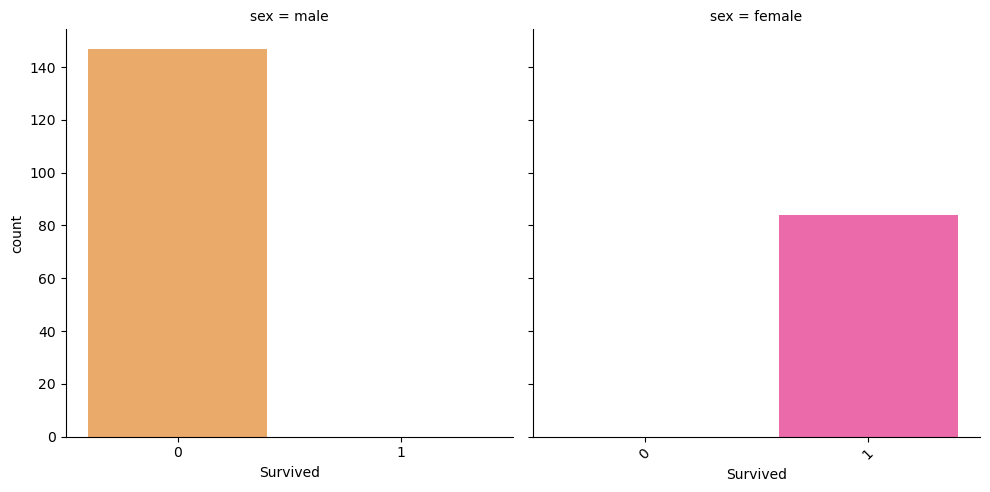

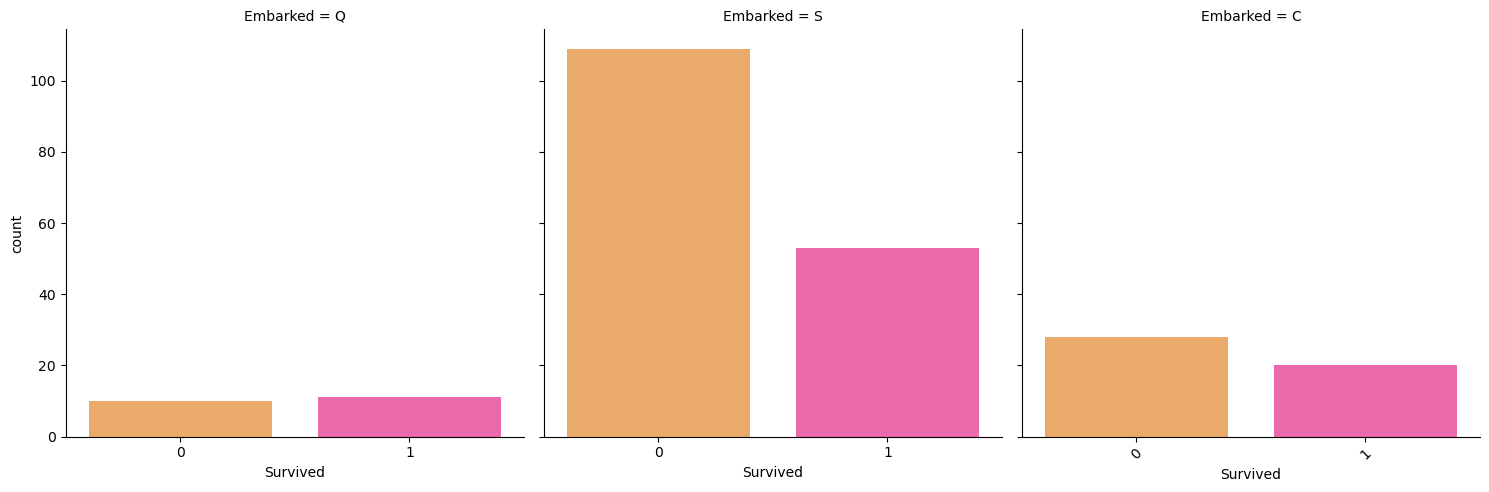

In [16]:
# Loop through each categorical_col
for col in categorical_col:
    if col != 'Survived':  # Exclude the 'class_type' itself from plotting
        sns.catplot(x="Survived", col=col, data=df, kind="count", palette="spring_r")
        plt.xticks(rotation=45)
        plt.show()

# Checking how the data is distributed in each columns

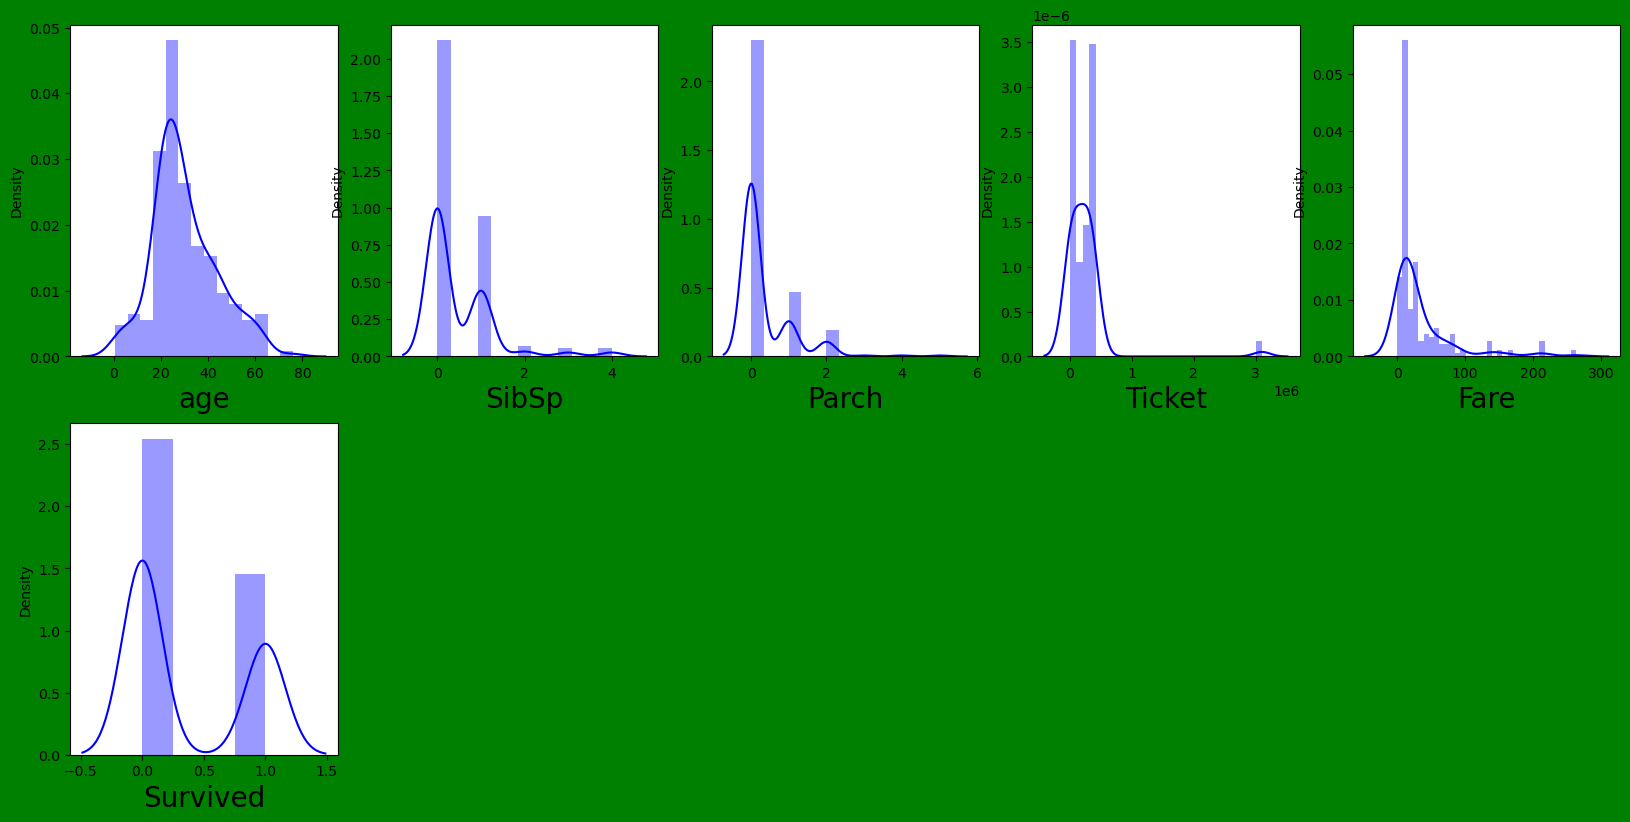

In [17]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in numerical_col:
    if plotnumber <= 10:
        ax =plt.subplot(5,5,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Now checking for outleirs

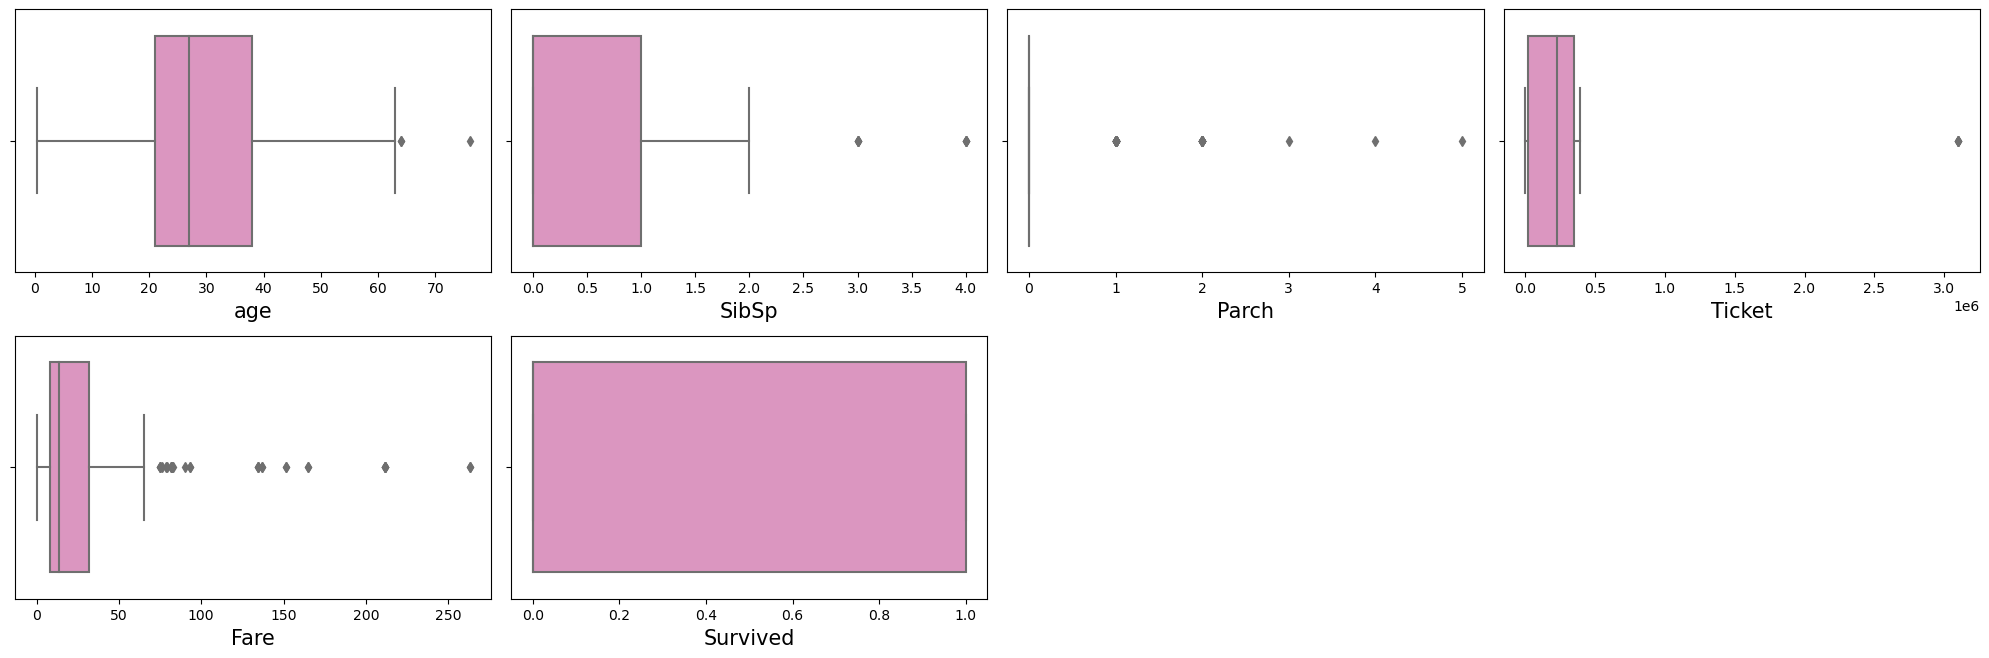

In [18]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

In [19]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['age', 'SibSp','Ticket','Fare']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
        sex   age  SibSp  Parch  Ticket     Fare Embarked  Survived
0      male  34.5      0      0  330911   7.8292        Q         0
1    female  47.0      1      0  363272   7.0000        S         1
2      male  62.0      0      0  240276   9.6875        Q         0
3      male  27.0      0      0  315154   8.6625        S         0
5      male  14.0      0      0    7538   9.2250        S         0
..      ...   ...    ...    ...     ...      ...      ...       ...
224  female  22.0      0      1  112378  59.4000        C         1
225    male  17.0      0      0  113059  47.1000        S         0
226    male  43.0      1      0   17765  27.7208        C         0
227    male  23.0      1      0   28666  10.5000        S         0
230  female  28.0      0      0  347086   7.7750        S         1

[189 rows x 8 columns]

Outliers removed:
        sex   age  SibSp  Parch   Ticket      Fare Embarked  Survived
4    female  22.0      1      1  310

# Convert the categorical columns into numerical columns

In [20]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize Ordinal Encoder
OE = OrdinalEncoder()

mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtype == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[[col]])
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
      sex   age  SibSp  Parch  Ticket     Fare  Embarked  Survived
0    1.0  34.5      0      0  330911   7.8292       1.0         0
1    0.0  47.0      1      0  363272   7.0000       2.0         1
2    1.0  62.0      0      0  240276   9.6875       1.0         0
3    1.0  27.0      0      0  315154   8.6625       2.0         0
5    1.0  14.0      0      0    7538   9.2250       2.0         0
..   ...   ...    ...    ...     ...      ...       ...       ...
224  0.0  22.0      0      1  112378  59.4000       0.0         1
225  1.0  17.0      0      0  113059  47.1000       2.0         0
226  1.0  43.0      1      0   17765  27.7208       0.0         0
227  1.0  23.0      1      0   28666  10.5000       2.0         0
230  0.0  28.0      0      0  347086   7.7750       2.0         1

[189 rows x 8 columns]

Mappings for each column:
sex mapping: {'male': 1.0, 'female': 0.0}
Embarked mapping: {'Q': 1.0, 'S': 2.0, 'C': 0.0}


# Checking Skewness

In [29]:
df1.skew()

sex        -0.712776
age         0.511401
SibSp       1.448724
Parch       3.539315
Ticket     -0.233293
Fare        1.574386
Embarked   -1.315166
Survived    0.712776
dtype: float64

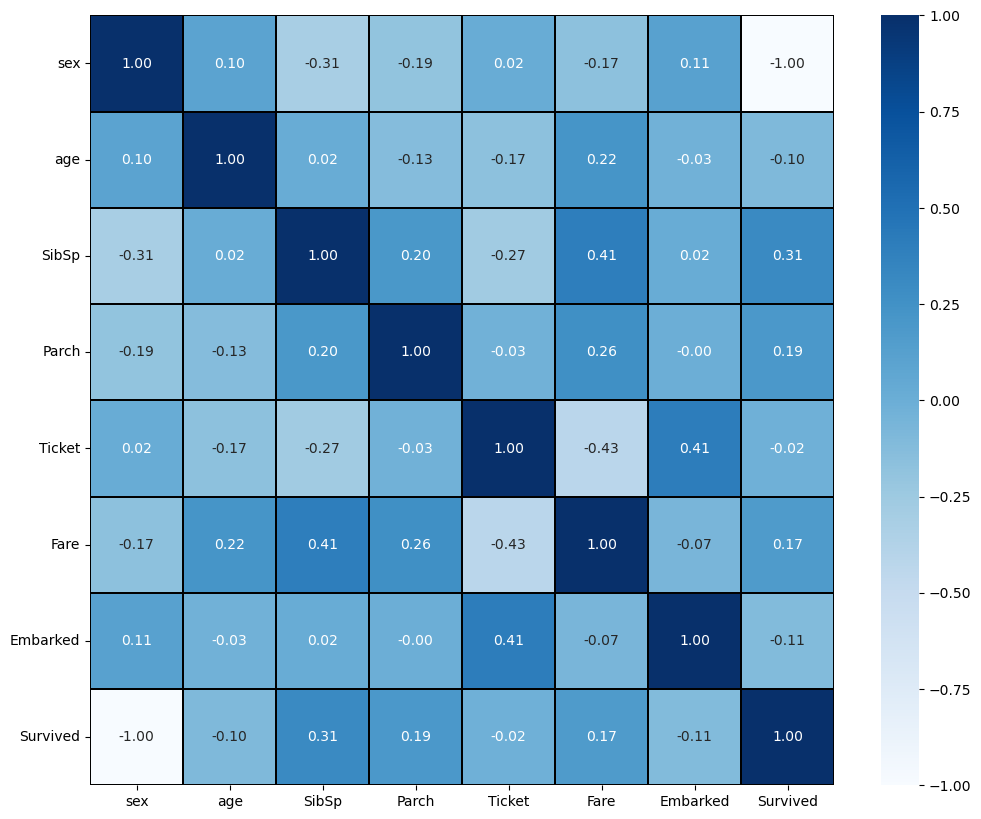

In [30]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

All columns looks perfecr no need to change

# Separating the features and target variables

In [31]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [32]:
y.value_counts()

0    126
1     63
Name: Survived, dtype: int64

# Using smote to balanced the data

In [33]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [34]:
y1.value_counts()

0    126
1    126
Name: Survived, dtype: int64

# Find the best random state and accuracy

In [43]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [36]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [37]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 1.0 at random_state 1


# Creating train test split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30,random_state = maxRS)

# Check all Machine Learning Algorithm

In [50]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "ExtraTreesClassifier" :ExtraTreesClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "BaggingClassifier" :BaggingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Loop through each classifier
for name, clf in classifiers.items():
    print(f"\nClassifier: {name}")
    
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Make predictions on the test set
    pred = clf.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Generate classification report
    report = classification_report(y_test, pred)
    print("Classification Report:")
    print(report)


Classifier: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[41  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        16

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Classifier: Support Vector Machine
Accuracy: 0.7192982456140351
Confusion Matrix:
[[41  0]
 [16  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        41
           1       0.00      0.00      0.00        16

    accuracy                           0.72        57
   macro avg       0.36      0.50      0.42        57
weighted avg       0.52      0.72      0.60        57


Classifier: ExtraTreesClassifier
Accuracy: 1.0
Confusion Matrix:
[[41  0]
 [ 0 16]]
Classification Report:
            

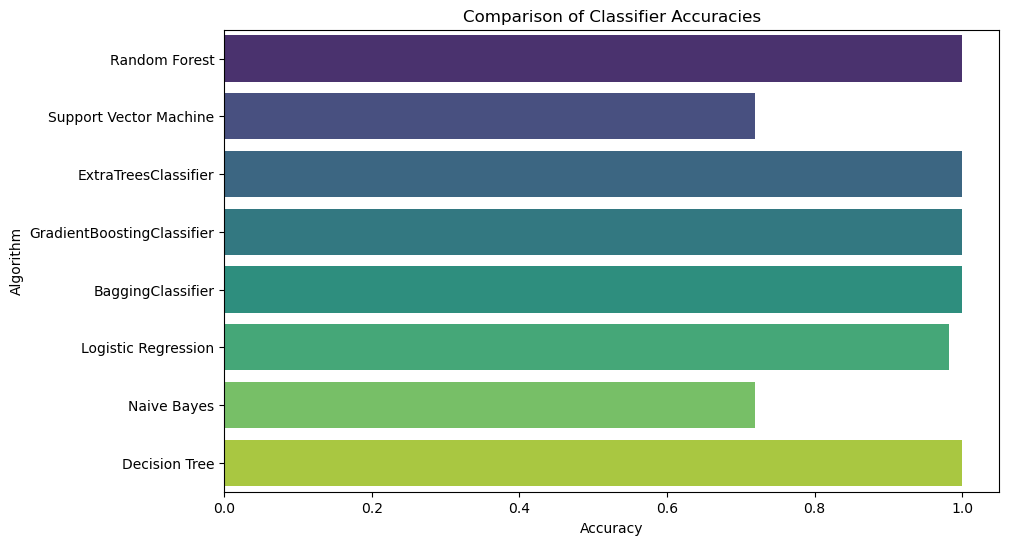

In [51]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "ExtraTreesClassifier" :ExtraTreesClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "BaggingClassifier" :BaggingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# Loop through each classifier and compute accuracy
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores[name] = accuracy

# Convert accuracy scores to a DataFrame for easier plotting
import pandas as pd
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=accuracy_df, palette="viridis")
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()

Here we can see that all algorithm accuracy is best

# Final Model

In [52]:
Final_model = RandomForestClassifier()
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


# Saving the model joblib

In [54]:
# Saving the model
import joblib
joblib.dump(Final_model,"titanic_project.pkl")

['titanic_project.pkl']

In [56]:
import pickle
filename = "titanic_project.pkl"
pickle.dump(Final_model, open(filename,'wb'))  #Saved model

# Final Accuracy

In [57]:
load_model = pickle.load(open("titanic_project.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

100.0


Here i can see that 100% accuracy 

# Conclusion

In [58]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Predicted,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
Original,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1


# Predict titanic Survived

In [62]:
import joblib

# Define the mapping dictionaries
sex_mapping = {'male': 1.0, 'female': 0.0}
embarked_mapping = {'Q': 1.0, 'S': 2.0, 'C': 0.0}

# Define the input data (characteristics)
input_data_raw = ['male', 34.5, 0, 0, 330911, 7.8292, 'Q']

# Preprocess the input data
input_data_numerical = [
    sex_mapping[input_data_raw[0]],          # Convert sex
    input_data_raw[1],                       # Age
    input_data_raw[2],                       # SibSp
    input_data_raw[3],                       # Parch
    input_data_raw[4],                       # Ticket number (if used)
    input_data_raw[5],                       # Fare
    embarked_mapping[input_data_raw[6]]      # Convert embarked
]

# Load your trained model
model = joblib.load('titanic_project.pkl')

# Make prediction using the trained model
prediction = model.predict([input_data_numerical])

# Print the input data and predicted survived
print("Input Data (Numerical):", input_data_numerical)
print("Predicted survived:", prediction[0])

Input Data (Numerical): [1.0, 34.5, 0, 0, 330911, 7.8292, 1.0]
Predicted survived: 0


In [63]:
if prediction == 0:
    print("This man will not survive during the disaster")
    
else:
    print("This man will survive during the disaster")  

This man will not survive during the disaster


# THANK YOU 